# Fuel efficiency prediction project

The goal of this notebook is to demonstrate the practical use of concepts presented in previous presentations on a real dataset, going through all the necessary steps of data loading, exploratory analysis and cleaning, building and training a model, and finally - evaluating the results.

## The dataset

Dataset used in this project is Auto MPG, which describes city-cycle fuel consumption of automobiles from the turn of 70s/80s decades.

The attributes that can be found in the data:

1. mpg: continuous
2. cylinders: multi-valued discrete
3. displacement: continuous
4. horsepower: continuous
5. weight: continuous
6. acceleration: continuous
7. model year: multi-valued discrete
8. origin: multi-valued discrete
9. car name: string (unique for each instance)

Dataset URL on UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/datasets/auto+mpg

In [3]:
# Import requests to download the dataset
import requests


# Download the dataset
dataset_source_url = "https://archive.ics.uci.edu/" + \
                     "ml/machine-learning-databases/" + \
                     "auto-mpg/auto-mpg.data"
filename = dataset_source_url.split("/")[-1] or "auto-mpg.data"
response = requests.get(dataset_source_url)
response.raise_for_status()

with open(filename, "wb") as f:
    f.write(response.content)

print(f"Succesfully downloaded dataset to file: {filename}")

Succesfully downloaded dataset to file: auto-mpg.data


In [14]:
# Import pandas library
import pandas as pd


# Read the dataset
column_names = [
    "mpg", "cylinders", "displacement", "horsepower", 
    "weight", "acceleration", "model_year", "origin"
]

dataset_raw = pd.read_csv(
    filepath_or_buffer=filename, # name of file containing data
    names=column_names, # list of column names
    comment="\t", # treats car model column as comment whic means
                  # that it won't be read as data
    sep=" ", # delimiter to use
    skipinitialspace=True, # skip spaces after delimiter
    na_values="?" # character used for missing values
)

# Show first five rows
dataset_raw.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


In [15]:
# Create copy of the dataset that we can operate on
dataset = dataset_raw.copy()

# Show number of missing values for each column
dataset.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
dtype: int64

In [16]:
# Remove missing values, use inplace to modify existing dataframe
dataset.dropna(inplace=True)

# Show number of missing values for each column, again
dataset.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
dtype: int64

In [17]:
# We must encode 'origin' column, because it's categorical feature.
# Categorical features shouldn't be left as simple discrete integer values
# because there's no actual, numeric relations between categories encoded as int
# example - if USA is 1 and Japan is 3 it doesn't mean that Japan is somehow 
# two units apart from USE, or greater than it.

# First, let's see how many different origin categories do we have
dataset['origin'].unique().tolist()

[1, 3, 2]

In [18]:
# This category split can be achieved by Pandas feature of "creating dummies"
dataset_encoded = pd.get_dummies(dataset, columns=['origin'], prefix='origin')
dataset_encoded.tail()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin_1,origin_2,origin_3
393,27.0,4,140.0,86.0,2790.0,15.6,82,True,False,False
394,44.0,4,97.0,52.0,2130.0,24.6,82,False,True,False
395,32.0,4,135.0,84.0,2295.0,11.6,82,True,False,False
396,28.0,4,120.0,79.0,2625.0,18.6,82,True,False,False
397,31.0,4,119.0,82.0,2720.0,19.4,82,True,False,False


In [20]:
# Import sklearn train_test_split method
from sklearn.model_selection import train_test_split

# Define random state for reproducibility
seed = 2137
# Split dataset into training and test sets
dataset_train, dataset_test = train_test_split(dataset_encoded, 
                                               test_size=0.2,
                                               random_state=seed)
# Display sizes of entire dataset and two split sets
print(f"Entire dataset length: {len(dataset_encoded)}")
print(f"Training set length: {len(dataset_train)}")
print(f"Test set length: {len(dataset_test)}")

Entire dataset length: 392
Training set length: 313
Test set length: 79


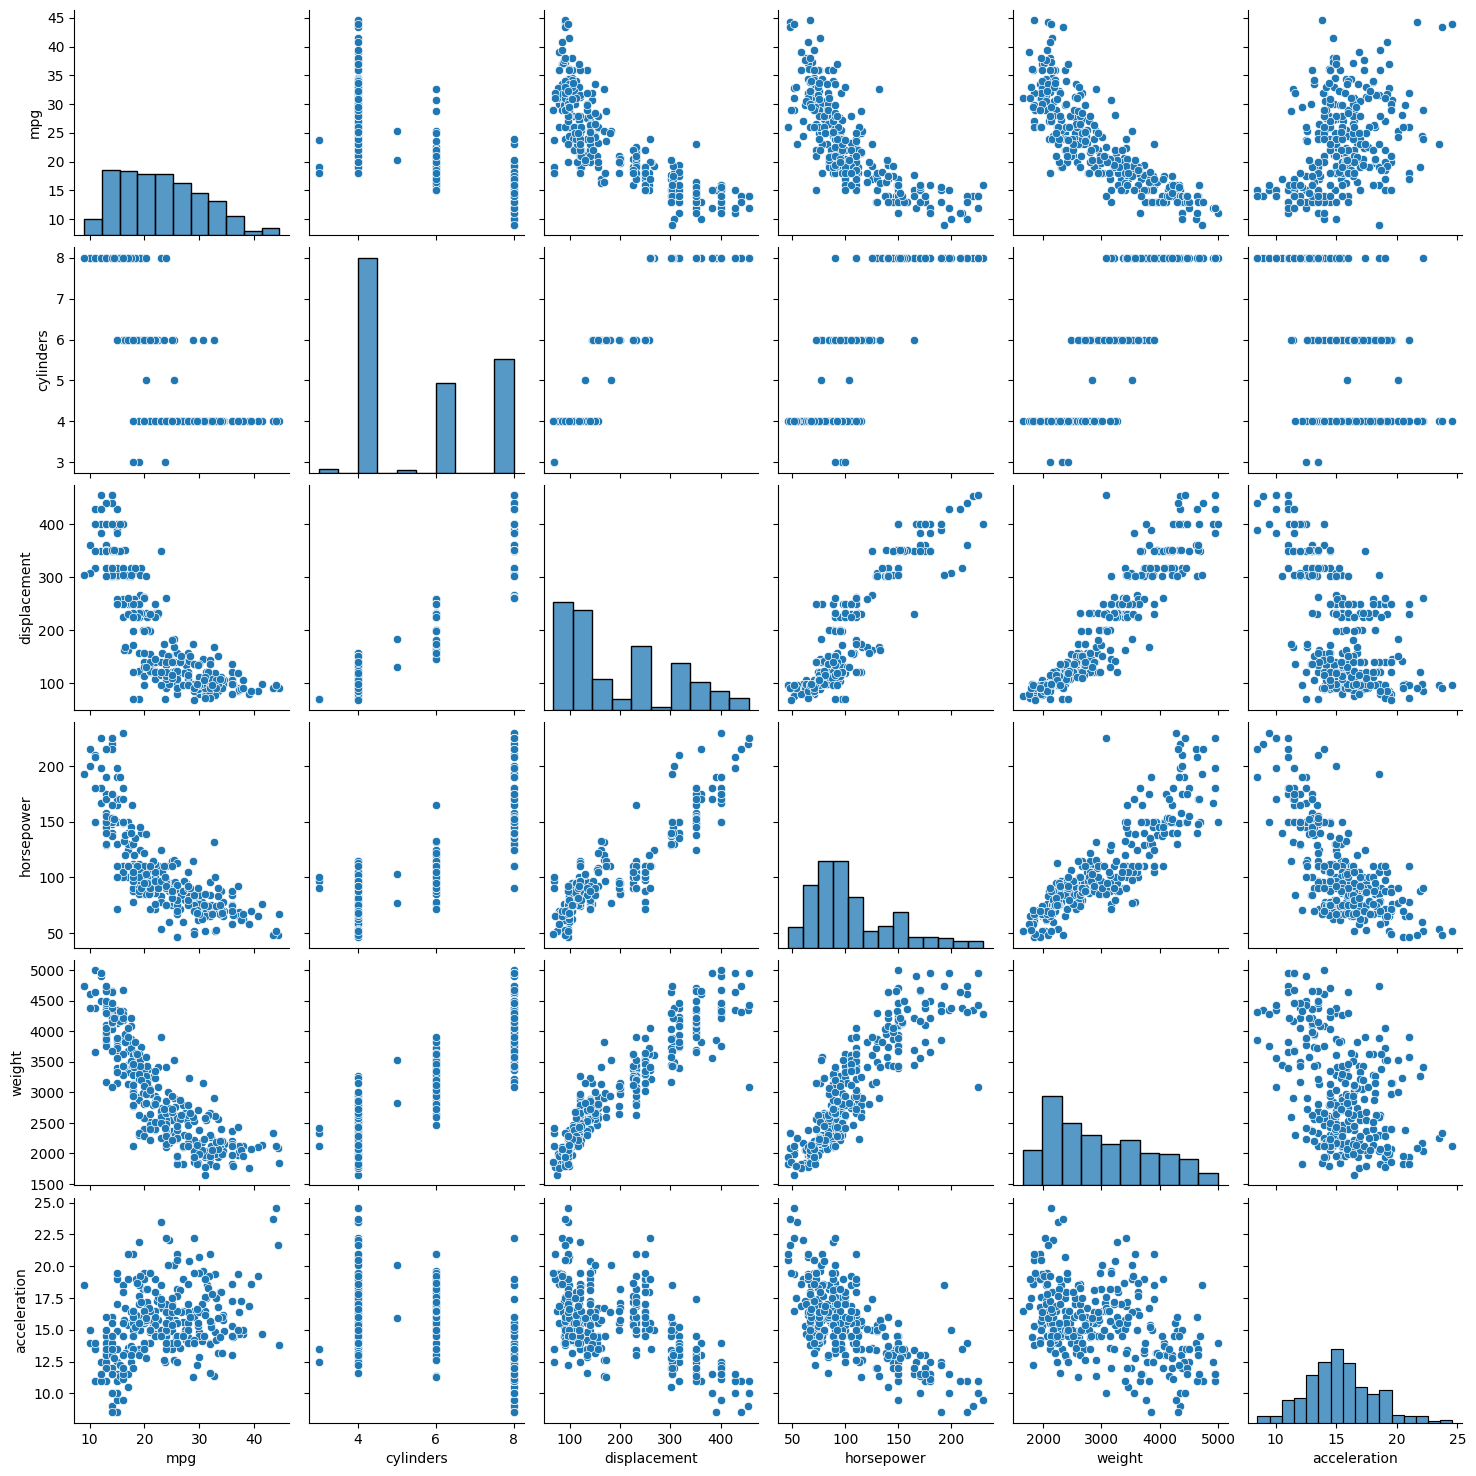

In [24]:
# Import seaborn for data visualization
import seaborn as sns

# Visualize relations between feature pairs on a pairwise scatter plot
sns.pairplot(
    # Select all columns except encoded origins and model year
    dataset_train[
        ["mpg", "cylinders", "displacement", 
         "horsepower", "weight", "acceleration"]
    ],
    diag_kind="hist"
)

In [28]:
# Use pandas describe features to see values like mean, standard deviation, etc.
# for the dataset
# Drop count column since we already know that from checking split sizes.
dataset_train.describe().drop(['count']).T

,mean,std,min,25%,50%,75%,max
mpg,22.982748,7.614516,9.0,17.0,22.0,28.4,44.6
cylinders,5.492013,1.713661,3.0,4.0,4.0,8.0,8.0
displacement,196.166134,105.573789,68.0,105.0,151.0,302.0,455.0
horsepower,106.214058,39.523389,46.0,78.0,95.0,130.0,230.0
weight,2990.651757,846.000116,1649.0,2246.0,2800.0,3620.0,4997.0
acceleration,15.431949,2.764647,8.5,13.5,15.4,17.0,24.6
model_year,75.779553,3.640843,70.0,73.0,76.0,79.0,82.0
